In [2]:
import pickle
import copy
import torch
import time
import numpy as np
np.set_printoptions(precision = 4)

import sys
sys.path.append('./../')

from datasets.dataset import _load_collection_real,_load_collection_syn,_load_collection_bbq_data
from models_utility.construct_models import _initialize_SMkernel_hyp,_make_gpmodel
from models_utility.param_gp import Param



from kernels.RBF_kernel import RBF
from kernels.SM_kernel import SM
from scipy.linalg import norm as fnorm


from utility.eval_metric import _evaluate_metric
import matplotlib.pyplot as plt



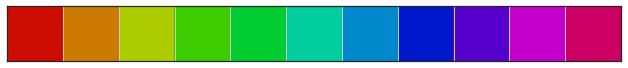

In [3]:
import seaborn as sns
sns.set()
sns.set_style('white')



plt.rcParams["axes.grid"] = True
plt.rc('font', family='serif')
#plt.rc('font', weight='bold')

current_palette = sns.color_palette(sns.hls_palette(10+1, l=.4, s=1.0))
sns.palplot(current_palette)
current_palette = np.asarray(current_palette)

In [4]:
random_seed = 1000
device = True

#SM_Q2_exp1.mat 40.9 kB9일 전

filename = 'SM_Q2_exp1'
#filename = 'SM_Q5_exp1_unequal_v3'
#SM_Q5_exp1_unequal_v3

#filename = 'SM_Q10_exp1_unequal_v3'
x_train, x_test, x_full, y_train, y_test,y_full,Dataset = _load_collection_syn(filename, cuda_option=device)


#filename = 'buzz'
#filename = 'pumadyn8nh'
#x_train, x_test, y_train, y_test = _load_collection_ssdkl_data(filename, random_seed=random_seed, numtotal=200000, cuda_option=device)


#loaded collection#
/home/yohan/Myenv/Summit_Conference/ICML21_SMapproximation/test


FileNotFoundError: [Errno 2] No such file or directory: './datasets/synthetic/SM_Q2_exp1.mat'

In [5]:
setting_dict = {}
setting_dict['random_seed'] = random_seed
setting_dict['init_sample_num'] = 500

#setting_dict['input_dim'] = x_train.shape[1]
setting_dict['input_dim'] = 1

setting_dict['Num_Q'] = 5
setting_dict['num_sample_pt'] = 3
setting_dict['num_batch'] = 1


setting_dict['lr_hyp'] = 1e-3         #0.001,0.0005  error -- >0.0001 equal_reg

setting_dict['kl_option'] = True   #['True','False']
setting_dict['num_batch'] = 1
setting_dict['tau0'] = 1000
setting_dict['iter'] = 10000        #[5000,8000]
setting_dict['num_rep'] = 1
setting_dict['weight_rate'] = 1e-3  # [1e-2,1e-3,1e-5]
setting_dict['optimizer'] = 'Adam'   #['SGD','Adam']
setting_dict['lr_hyp'] = 1e-3


setting_dict['noise_err'] = 0.05*y_train.std()


setting_dict = _initialize_SMkernel_hyp( x_train,y_train, setting_dict, random_seed)


NameError: name 'y_train' is not defined

In [ ]:
0.5

In [6]:
# vssgp_model = vssgp(x_train,y_train,setting_dict,device = device)
# vssgp_model._set_data(batch_x=x_train, batch_y=y_train)
# vssgp_model._set_inducing_pt(setting_dict['Num_Q'] * setting_dict['num_sample_pt'])
# vssgp_model.train()    

#ith_model_name = 'weight_reg'
#ith_model_name = 'equal_reg'
ith_model_name = 'gpsm'
model = _make_gpmodel(model_name=ith_model_name, setting_dict=setting_dict, device=device)
model

KeyError: 'hypparam'

In [ ]:
optimizable_param =  [*model.parameters(),model.likelihood.variance]
#optimizable_param =  [*model.parameters()]
optimizable_param

In [1]:
ith_model_name

NameError: name 'ith_model_name' is not defined

In [ ]:
from models_utility.personalized_adam import Adam_variation

# optimizer = Adam_variation(optimizable_param ,
#                            lr=0.005,
#                            betas=(0.9, 0.99),
#                            eps=1e-08,
#                            weight_decay=0.0)

optimizer = torch.optim.Adam(optimizable_param ,
                               lr=0.005,
                               betas=(0.9, 0.99),
                               eps=1e-08,
                               weight_decay=0.0)

In [ ]:
# 0 th loss0 : -595.5007, reg0 : 0.0000, test rmse : 7.7815, test mnll: : 226.2088
# self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance

# 50 th loss0 : -1081.4603, reg0 : 0.0000, test rmse : 0.2438, test mnll: : 0.2527
# self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance

# 100 th loss0 : -1208.1608, reg0 : 0.0000, test rmse : 0.1336, test mnll: : -0.1542
# self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance

# 150 th loss0 : -1278.1105, reg0 : 0.0000, test rmse : 0.1069, test mnll: : -0.4631
# self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance

# 200 th loss0 : -1324.3414, reg0 : 0.0000, test rmse : 0.1024, test mnll: : -0.6532
# self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance

# 250 th loss0 : -1355.5130, reg0 : 0.0000, test rmse : 0.1011, test mnll: : -0.7479
# self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance

# 300 th loss0 : -1382.4940, reg0 : 0.0000, test rmse : 0.1007, test mnll: : -0.7964
# self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance

# 350 th loss0 : -1405.8946, reg0 : 0.0000, test rmse : 0.1008, test mnll: : -0.8241
# self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance

# 400 th loss0 : -1424.5523, reg0 : 0.0000, test rmse : 0.1012, test mnll: : -0.8398
# self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance

# 450 th loss0 : -1439.5150, reg0 : 0.0000, test rmse : 0.1013, test mnll: : -0.8519
# self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance

###

# 0 th loss0 : -595.5007, reg0 : 0.0000, test rmse : 7.7815, test mnll: : 226.2094
# self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance

# 50 th loss0 : -1059.3217, reg0 : 0.0000, test rmse : 0.3562, test mnll: : 0.4829
# self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance

# 100 th loss0 : -1192.3015, reg0 : 0.0000, test rmse : 0.1277, test mnll: : -0.1609
# self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance

# 150 th loss0 : -1252.8665, reg0 : 0.0000, test rmse : 0.1060, test mnll: : -0.4748
# self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance

# 200 th loss0 : -1295.8831, reg0 : 0.0000, test rmse : 0.1016, test mnll: : -0.6759
# self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance

# 250 th loss0 : -1329.5363, reg0 : 0.0000, test rmse : 0.1016, test mnll: : -0.7728
# self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance

# 300 th loss0 : -1356.7233, reg0 : 0.0000, test rmse : 0.1009, test mnll: : -0.8228
# self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance

# 350 th loss0 : -1378.7871, reg0 : 0.0000, test rmse : 0.1006, test mnll: : -0.8484
# self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance

# 400 th loss0 : -1396.5084, reg0 : 0.0000, test rmse : 0.1007, test mnll: : -0.8608
# self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance

# 450 th loss0 : -1411.2996, reg0 : 0.0000, test rmse : 0.1010, test mnll: : -0.8660
# self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance


In [ ]:
for i in range(setting_dict['iter'] + 1):


    ith_tic = time.time()    
    optimizer.zero_grad()    
    
    
    
#     ith_loss,ith_reg= model.compute_loss(batch_x=x_train, batch_y=y_train, kl_option=setting_dict['kl_option'])
#     #losstotal = ith_loss + ith_reg
#     losstotal = ith_loss + ith_reg



    ith_loss = model.compute_loss(batch_x=x_train, batch_y=y_train, kl_option=setting_dict['kl_option'])
    #losstotal = ith_loss + ith_reg
    ith_reg = torch.tensor(0.0).cuda()
    losstotal = ith_loss    
    
    
    
    losstotal.backward()
    optimizer.step()

    
#     pred_test_mu, pred_test_var = model._predict( inputs_new=x_test)    
#     ith_rmse,ith_mnll = _evaluate_metric(pred_test_mu, pred_test_var, y_test)

#     if i%500 == 0 :
#         print('%d th loss: %.3f, mse : %.3f, mnll : %.3f' % (i, ith_loss.cpu().data.numpy(), ith_rmse, ith_mnll))

    
    
    with torch.no_grad():
        pred_train_mu, pred_train_var = model._predict(inputs_new=x_train)
        pred_test_mu, pred_test_var = model._predict(inputs_new=x_test)


    # out1 : root mean square (rmse)
    # out2 : mean negative log likelihood (mnll)
    #ith_rmse,ith_mnll = _evaluate_metric(pred_test_mu, pred_test_var, y_test)
    ith_rmse,ith_mnll = _evaluate_metric(pred_test_mu, pred_test_var, y_test)




    if i % 50 == 0 :
        print('%d th loss0 : %.4f, reg0 : %.4f, test rmse : %.4f, test mnll: : %.4f' % (i,ith_loss.cpu().data.numpy(),ith_reg.cpu().data.numpy(),ith_rmse,ith_mnll))
        try:
            print('self.weight.exp(),self.mu.exp(),self.std.exp(),likelihood variance')            
            print(model.weight.exp().squeeze(),model.mu.exp().squeeze(),model.std.exp().squeeze(),model.likelihood.variance.transform()**2)

            print('\n')
            print('self.num_samplept_list_at')
            print(model.num_samplept_list_at)
        except:
            pass
        
#                 print('self.weight.exp(),self.mu.exp(),self.std.exp()')            
#                 print(ith_model.kernel.weight.exp().squeeze(),ith_model.kernel.mu.exp().squeeze(),ith_model.kernel.std.exp().squeeze())

        print('')

    
    




In [ ]:
# pred_train_mu
# with torch.no_grad():
#     pred_train_mu, pred_train_var = ith_model._predict(inputs_new=x_train)
#     pred_test_mu, pred_test_var = ith_model._predict(inputs_new=x_full)
#     prede_test_mu, prede_test_var = ith_model._predict_exact(inputs_new = x_full, diag=True)
#     ith_ermse,ith_emnll = _evaluate_metric(prede_test_mu, prede_test_var, y_full)
# #     ith_ermse,ith_emnll 

In [ ]:
with torch.no_grad():
    pred_train_mu, pred_train_var = model._predict( inputs_new=x_train)
    #pred_train_mu, pred_train_var = model._predict_exact(inputs_new = x_train, diag=True)
    


plt.figure(figsize=(20,3))
if x_train.shape[1] == 1:
    plt.plot(x_train.cpu().data.numpy(),pred_train_mu.cpu().data.numpy(),'b.')
    plt.plot(x_train.cpu().data.numpy(),y_train.cpu().data.numpy(),'r.')
    plt.fill_between( x_train.cpu().data.numpy().squeeze(),
                      pred_train_mu.cpu().data.numpy().squeeze() - np.sqrt(pred_train_var.cpu().data.numpy()).squeeze(),
                      pred_train_mu.cpu().data.numpy().squeeze() + np.sqrt(pred_train_var.cpu().data.numpy()).squeeze(),
                      alpha = 0.5, edgecolor = 'b', facecolor = 'b')
else:
    plt.plot(pred_train_mu.cpu().data.numpy(),'b.')
    plt.plot(y_train.cpu().data.numpy(),'r.')
#     plt.fill_between( x_train.cpu().data.numpy().squeeze(),
#                       pred_train_mu.cpu().data.numpy().squeeze() - np.sqrt(pred_train_var.cpu().data.numpy()).squeeze(),
#                       pred_train_mu.cpu().data.numpy().squeeze() + np.sqrt(pred_train_var.cpu().data.numpy()).squeeze(),
#                       alpha = 0.5, edgecolor = 'b', facecolor = 'b')        

_evaluate_metric(pred_train_mu, pred_train_var, y_train)

In [ ]:
#torch.vs
#x_test2 = torch.cat([x_test],dim=0)
#x_test2 = torch.cat([x_test,x_test+5,x_test+10],dim=0)

In [ ]:
with torch.no_grad():
    pred_test_mu, pred_test_var = model._predict( inputs_new=x_test)
    #pred_test_mu, pred_test_var = model._predict_exact(inputs_new = x_test, diag=True)

plt.figure(figsize=(20,3))
if x_test.shape[1] == 1:
    plt.plot(x_test.cpu().data.numpy(),y_test.cpu().data.numpy(),'r.')
    plt.plot(x_test.cpu().data.numpy(),pred_test_mu.cpu().data.numpy(),'b.')
    plt.fill_between( x_test.cpu().data.numpy().squeeze(),
                      pred_test_mu.cpu().data.numpy().squeeze() - np.sqrt(pred_test_var.cpu().data.numpy()).squeeze(),
                      pred_test_mu.cpu().data.numpy().squeeze() + np.sqrt(pred_test_var.cpu().data.numpy()).squeeze(),
                      alpha = 0.5, edgecolor = 'b', facecolor = 'b')
else:   
    plt.plot(pred_test_mu.cpu().data.numpy(),'b.')
    #plt.plot(y_test.cpu().data.numpy(),'r.')
#plt.ylim([-50,50])
_evaluate_metric(pred_test_mu, pred_test_var, y_test)

In [ ]:
pred_test_var.cpu().data.numpy()